In [3]:
pip install keras==2.12.0 tensorflow==2.12.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.12.0


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 220.2 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.3 MB 196.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.3 MB 252.2 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.3 MB 309.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 309.1 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.3 MB 370.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.3 MB 454.0 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.3 MB 509.6 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.3 MB 509.6 kB/s eta 0:00:03
   -------- ----------

In [3]:
pip install tf-keras

  Using cached tf_keras-2.18.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB 162.5 kB/s eta 0:00:11
   ---------------------------------------- 0.0/1.7 MB 162.5 kB/s eta 0:00:11
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:10
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:10
    --------------------------------------- 0.0/1.7 MB 140.3 kB/s eta 0:00:13
   - -------------------------------------- 0.1/1.7 MB 217.9 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.7 MB 261.7 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.7 MB 245.8 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.7 MB 276.8 kB/s eta 0:00:06
   ---- ----------------------------------- 0.2/1.7 MB 371.2 kB/s eta 0:00:05
   ----- -------

In [33]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns
from datasets import Dataset
from textblob import TextBlob
import spacy
#import gradio as gr

In [35]:
df = pd.read_csv("Dataset_Banking_chatbot.csv", encoding ="ISO-8859-1")
df.head()

,Query,Response
0,How can I open a new bank account?,"To open a new bank account, visit our website ..."
1,What do I need to provide to open a bank account?,"You will need to provide a valid ID, proof of ..."
2,How can I check my account balance?,You can check your account balance by logging ...
3,How do I transfer money between accounts?,Log into your online banking account or mobile...
4,Can I set up direct deposit for my paycheck?,"Yes, you can set up direct deposit by providin..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     145 non-null    object
 1   Response  145 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [39]:
import re

# Example function to clean the text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)   # Remove extra spaces
    text = re.sub(r'[^\w\s,?!]', '', text)  # Remove special characters
    return text

# Example of applying it on a dataset
cleaned_data = [clean_text(text) for text in df]

In [43]:
df.describe()

,Query,Response
count,145,145
unique,141,143
top,Do you offer investment services?,Activate your new credit card by calling the a...
freq,2,2


In [45]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

# Preprocessing Dataset

In [48]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Verify
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

Missing Values:
 Query       0
Response    0
dtype: int64

Missing Values After Cleaning:
 Query       0
Response    0
dtype: int64


In [50]:
# Function to expand contractions
def expand_contractions(text):
    contractions = {
        "don't": "do not",
        "can't": "cannot",
        "won't": "will not",
        # Add more contractions as needed
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

# Apply contraction expansion
df["Query"] = df["Query"].apply(expand_contractions)
df["Response"] = df["Response"].apply(expand_contractions)

# Display normalized data
print(df[["Query", "Response"]].head())

                                               Query  \
0                 How can I open a new bank account?   
1  What do I need to provide to open a bank account?   
2                How can I check my account balance?   
3          How do I transfer money between accounts?   
4       Can I set up direct deposit for my paycheck?   

                                            Response  
0  To open a new bank account, visit our website ...  
1  You will need to provide a valid ID, proof of ...  
2  You can check your account balance by logging ...  
3  Log into your online banking account or mobile...  
4  Yes, you can set up direct deposit by providin...  


In [53]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Overwrite the validation set with the entire dataset
val_df = df.copy()  # Validation set is now the entire dataset

# Reset the index for both datasets
train_data = train_df.reset_index(drop=True)
val_data = val_df.reset_index(drop=True)

# Check the shapes of the resulting datasets
print("Training data shape:", train_data.shape)  # Output: (116, 2)
print("Validation data shape:", val_data.shape)  # Output: (145, 2)

# Display the first 60 rows of the validation data
print(val_data.head(60))

Training data shape: (116, 2)
Validation data shape: (145, 2)
                                                Query  \
0                  How can I open a new bank account?   
1   What do I need to provide to open a bank account?   
2                 How can I check my account balance?   
3           How do I transfer money between accounts?   
4        Can I set up direct deposit for my paycheck?   
5        How do I report a lost or stolen debit card?   
6   What should I do if I forget my online banking...   
7                         How can I apply for a loan?   
8   What are your current interest rates for savin...   
9                     How do I close my bank account?   
10       Can I update my personal information online?   
11      What is the process to dispute a transaction?   
12                   How can I order a new checkbook?   
13       What are your fees for overdraft protection?   
14                How can I increase my credit limit?   
15              How do I a

In [57]:
from transformers import  GPT2Tokenizer

# Initialize the tokenizer and model
Model_name = 'gpt2-large'
tokenizer = GPT2Tokenizer.from_pretrained(Model_name)

# Add padding token to the tokenizer
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

# Prepare the datasets
train_data['text'] = train_data['Query'] + ' ' + train_data['Response']
val_data['text'] = val_data['Query'] + ' ' + val_data['Response']

train_dataset = Dataset.from_pandas(train_data[['text']])
val_dataset = Dataset.from_pandas(val_data[['text']])

# Tokenization and Label Creation function
def add_labels(examples):
    tokens = tokenizer(examples['text'], padding='max_length', truncation=True, max_length=250)
    return {
        'input_ids': tokens['input_ids'],
        'attention_mask': tokens['attention_mask'],
        'labels': tokens['input_ids']
    }

# Apply tokenization and label creation to both train and validation datasets
train_tokenized_dataset = train_dataset.map(add_labels, batched=True)
val_tokenized_dataset = val_dataset.map(add_labels, batched=True)

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

Map:   0%|          | 0/145 [00:00<?, ? examples/s]

# Exploratory Data Analysis (EDA)

#Analyze Query and Response Lengths

Query Length Summary:
 count    145.000000
mean       8.041379
std        1.971589
min        1.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       16.000000
Name: query_length, dtype: float64

Response Length Summary:
 count    145.000000
mean      20.965517
std        2.561504
min       14.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       27.000000
Name: response_length, dtype: float64


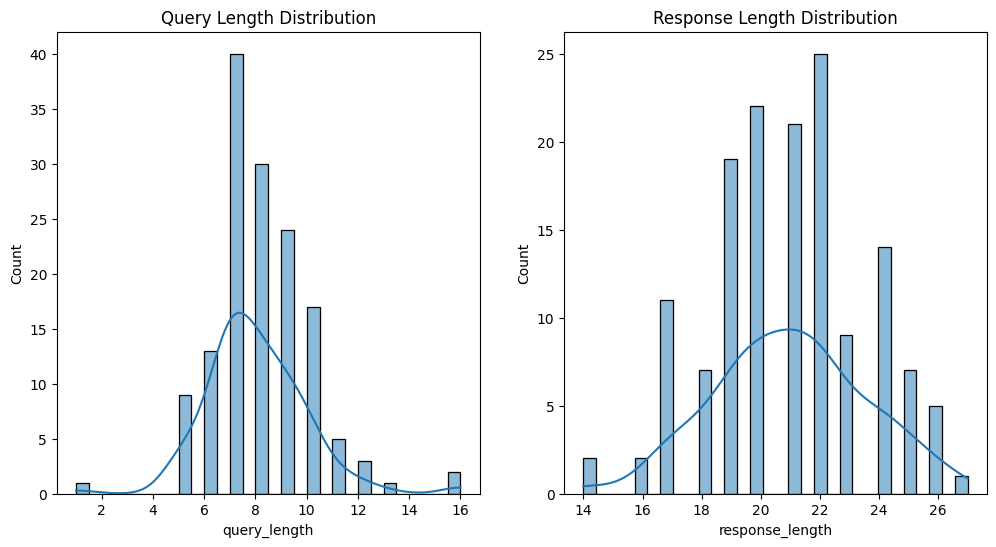

In [60]:
# Calculate query and response lengths
df["query_length"] = df["Query"].apply(lambda x: len(x.split()))
df["response_length"] = df["Response"].apply(lambda x: len(x.split()))

# Summary statistics for lengths
print("Query Length Summary:\n", df["query_length"].describe())
print("\nResponse Length Summary:\n", df["response_length"].describe())

# Plot query and response lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["query_length"], bins=30, kde=True)
plt.title("Query Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["response_length"], bins=30, kde=True)
plt.title("Response Length Distribution")

plt.show()

#Visualize Frequent Words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gnond\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Query Words: [('account', 48), ('get', 24), ('offer', 13), ('set', 12), ('loan', 12), ('credit', 12), ('card', 11), ('new', 9), ('bank', 8), ('accounts', 8)]

Top 10 Response Words: [('account', 108), ('online', 68), ('banking', 58), ('customer', 57), ('service', 56), ('contact', 53), ('visit', 42), ('yes', 41), ('website', 39), ('branch', 31)]


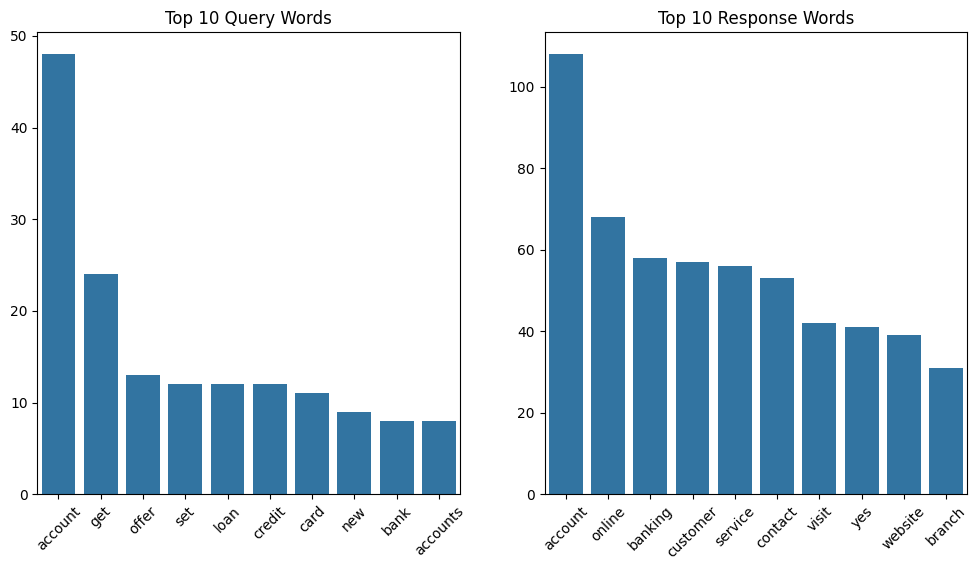

In [26]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords (if not already downloaded)
nltk.download("stopwords")

# Preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
    return tokens

# Combine all queries and responses into single strings
all_queries = " ".join(df["Query"].tolist())
all_responses = " ".join(df["Response"].tolist())

# Tokenize queries and responses
query_tokens = preprocess_text(all_queries)
response_tokens = preprocess_text(all_responses)

# Count word frequencies
query_word_freq = Counter(query_tokens)
response_word_freq = Counter(response_tokens)

# Display the 10 most common words in queries and responses
print("Top 10 Query Words:", query_word_freq.most_common(10))
print("\nTop 10 Response Words:", response_word_freq.most_common(10))

# Plot word frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[word for word, freq in query_word_freq.most_common(10)],
            y=[freq for word, freq in query_word_freq.most_common(10)])
plt.title("Top 10 Query Words")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[word for word, freq in response_word_freq.most_common(10)],
            y=[freq for word, freq in response_word_freq.most_common(10)])
plt.title("Top 10 Response Words")
plt.xticks(rotation=45)

plt.show()

#Analyze Word Frequency Distribution

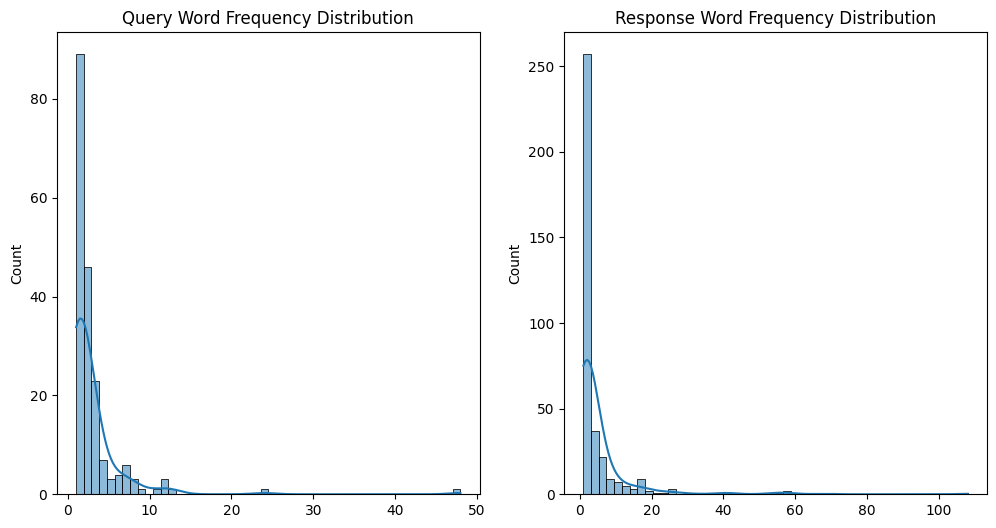

In [29]:
# Plot word frequency distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(list(query_word_freq.values()), bins=50, kde=True)
plt.title("Query Word Frequency Distribution")

plt.subplot(1, 2, 2)
sns.histplot(list(response_word_freq.values()), bins=50, kde=True)
plt.title("Response Word Frequency Distribution")

plt.show()

#Visualize Common Bigrams and Trigrams

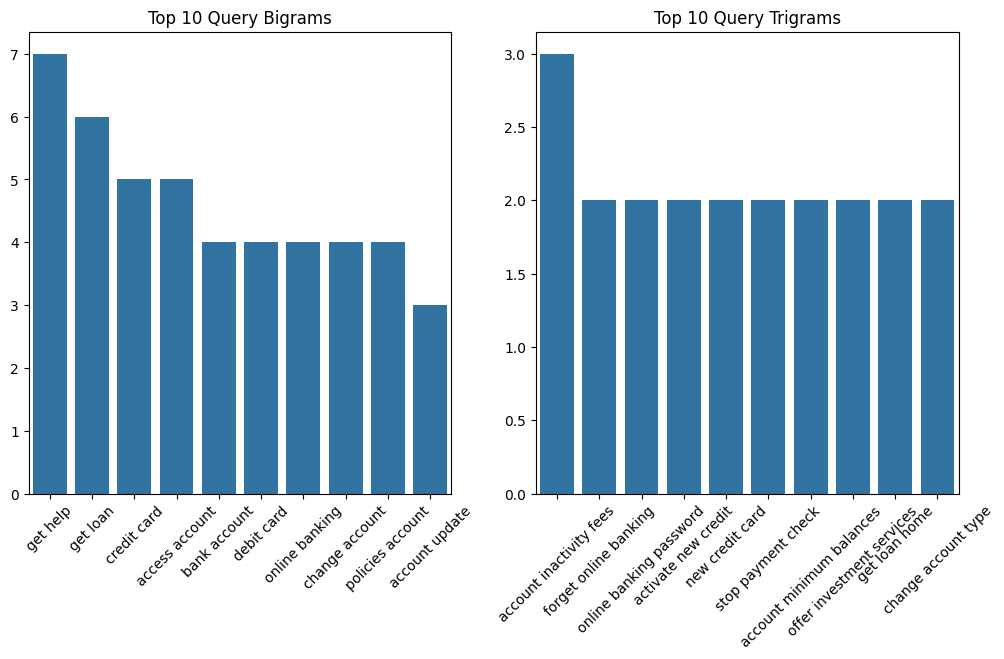

In [32]:
from nltk import ngrams

# Function to extract n-grams
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Extract bigrams and trigrams
query_bigrams = extract_ngrams(query_tokens, 2)
query_trigrams = extract_ngrams(query_tokens, 3)
response_bigrams = extract_ngrams(response_tokens, 2)
response_trigrams = extract_ngrams(response_tokens, 3)

# Count n-gram frequencies
query_bigram_freq = Counter(query_bigrams)
query_trigram_freq = Counter(query_trigrams)
response_bigram_freq = Counter(response_bigrams)
response_trigram_freq = Counter(response_trigrams)

# Plot top 10 bigrams and trigrams
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=[" ".join(gram) for gram, freq in query_bigram_freq.most_common(10)],
            y=[freq for gram, freq in query_bigram_freq.most_common(10)])
plt.title("Top 10 Query Bigrams")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=[" ".join(gram) for gram, freq in query_trigram_freq.most_common(10)],
            y=[freq for gram, freq in query_trigram_freq.most_common(10)])
plt.title("Top 10 Query Trigrams")
plt.xticks(rotation=45)

plt.show()

#Correlation 

In [35]:
# Calculate the length of queries and responses
df["query_length"] = df["Query"].apply(lambda x: len(x.split()))
df["response_length"] = df["Response"].apply(lambda x: len(x.split()))

# Display the first few rows
print(df[["Query", "query_length", "Response", "response_length"]].head())

                                               Query  query_length  \
0                 How can I open a new bank account?             8   
1  What do I need to provide to open a bank account?            11   
2                How can I check my account balance?             7   
3          How do I transfer money between accounts?             7   
4       Can I set up direct deposit for my paycheck?             9   

                                            Response  response_length  
0  To open a new bank account, visit our website ...               24  
1  You will need to provide a valid ID, proof of ...               20  
2  You can check your account balance by logging ...               25  
3  Log into your online banking account or mobile...               23  
4  Yes, you can set up direct deposit by providin...               20  


In [37]:
# Calculate correlation between query length and response length
correlation = df["query_length"].corr(df["response_length"])
print(f"Correlation between query length and response length: {correlation:.2f}")

Correlation between query length and response length: 0.03


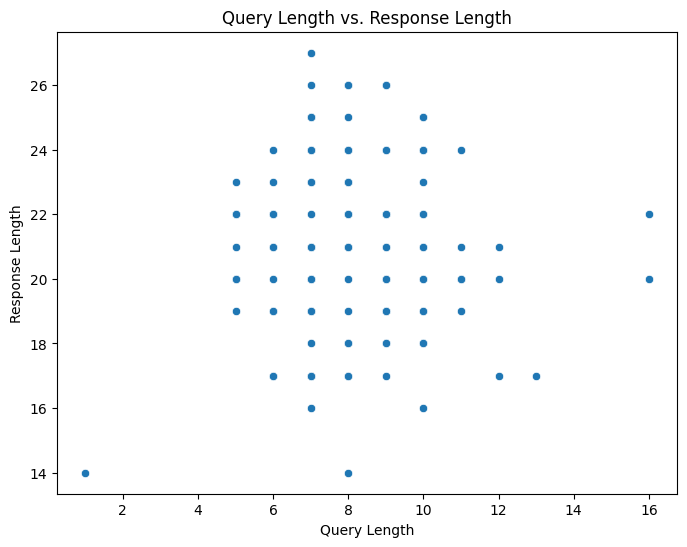

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of query length vs. response length
plt.figure(figsize=(8, 6))
sns.scatterplot(x="query_length", y="response_length", data=df)
plt.title("Query Length vs. Response Length")
plt.xlabel("Query Length")
plt.ylabel("Response Length")
plt.show()

   word  query_freq  response_freq
0   How          62              1
1   can          33             37
2     I         116              1
3  open           2              1
4     a          53             99
Correlation between query word frequency and response word frequency: 0.27


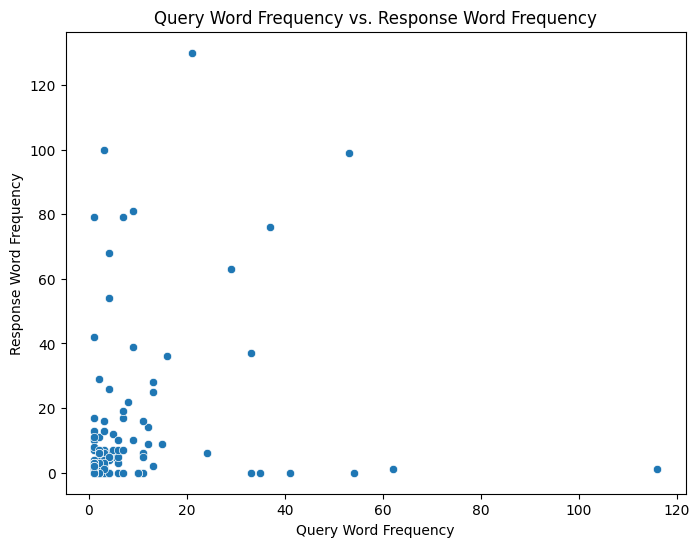

In [41]:
from collections import Counter

# Function to calculate word frequencies
def get_word_frequencies(texts):
    all_words = " ".join(texts).split()
    return Counter(all_words)

# Calculate word frequencies for queries and responses
query_word_freq = get_word_frequencies(df["Query"])
response_word_freq = get_word_frequencies(df["Response"])

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame({
    "word": list(query_word_freq.keys()),
    "query_freq": list(query_word_freq.values()),
    "response_freq": [response_word_freq.get(word, 0) for word in query_word_freq.keys()]
})

# Display the first few rows
print(word_freq_df.head())

# Calculate correlation between query word frequency and response word frequency
correlation = word_freq_df["query_freq"].corr(word_freq_df["response_freq"])
print(f"Correlation between query word frequency and response word frequency: {correlation:.2f}")

# Scatter plot of query word frequency vs. response word frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(x="query_freq", y="response_freq", data=word_freq_df)
plt.title("Query Word Frequency vs. Response Word Frequency")
plt.xlabel("Query Word Frequency")
plt.ylabel("Response Word Frequency")
plt.show()

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


                                               Query  query_sentiment  \
0                 How can I open a new bank account?         0.068182   
1  What do I need to provide to open a bank account?         0.000000   
2                How can I check my account balance?         0.000000   
3          How do I transfer money between accounts?         0.000000   
4       Can I set up direct deposit for my paycheck?         0.100000   

                                            Response  response_sentiment  
0  To open a new bank account, visit our website ...            0.045455  
1  You will need to provide a valid ID, proof of ...            0.033333  
2  You can check your account balance by logging ...            0.000000  
3  Log into your online banking account or mobile...            0.000000  
4  Yes, you can set up direct deposit by providin...            0.100000  
Correlation between query sentiment and response sentiment: 0.11


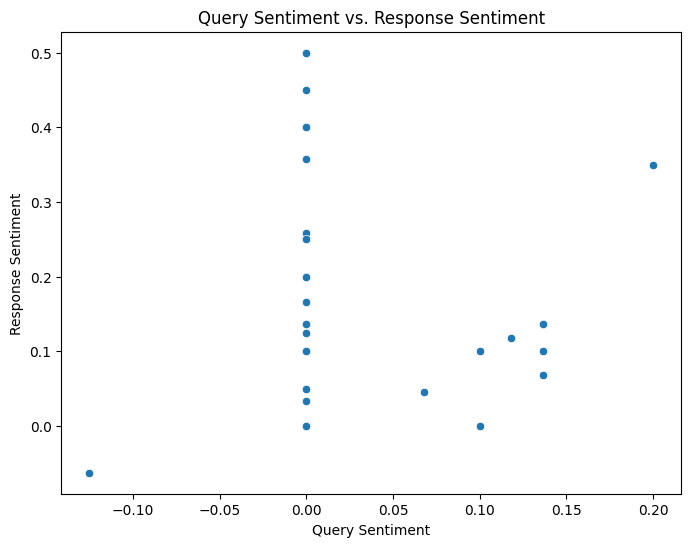

In [46]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment scores for queries and responses
df["query_sentiment"] = df["Query"].apply(get_sentiment)
df["response_sentiment"] = df["Response"].apply(get_sentiment)

# Display the first few rows
print(df[["Query", "query_sentiment", "Response", "response_sentiment"]].head())

# Calculate correlation between query sentiment and response sentiment
correlation = df["query_sentiment"].corr(df["response_sentiment"])
print(f"Correlation between query sentiment and response sentiment: {correlation:.2f}")

# Scatter plot of query sentiment vs. response sentiment
plt.figure(figsize=(8, 6))
sns.scatterplot(x="query_sentiment", y="response_sentiment", data=df)
plt.title("Query Sentiment vs. Response Sentiment")
plt.xlabel("Query Sentiment")
plt.ylabel("Response Sentiment")
plt.show()

In [48]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 280.5 kB/s eta 0:00:46
     --------------------------------------- 0.1/12.8 MB 327.7 kB/s eta 0:00:39
     --------------------------------------- 0.1/12.8 MB 359.9 kB/s eta 0:00:36
     --------------------------------------- 0.1/12.8 MB 387.0 kB/s eta 0:00:33
     --------------------------------------- 0.2/12.8 MB 366.6 kB/s eta 0:00:35
      -------------------------------------- 0.2/12.8 MB 397.4 kB/s eta 0:00:32
      -------------------------------------- 0.2/12.8 MB

Correlation between query nouns and response nouns: 0.53


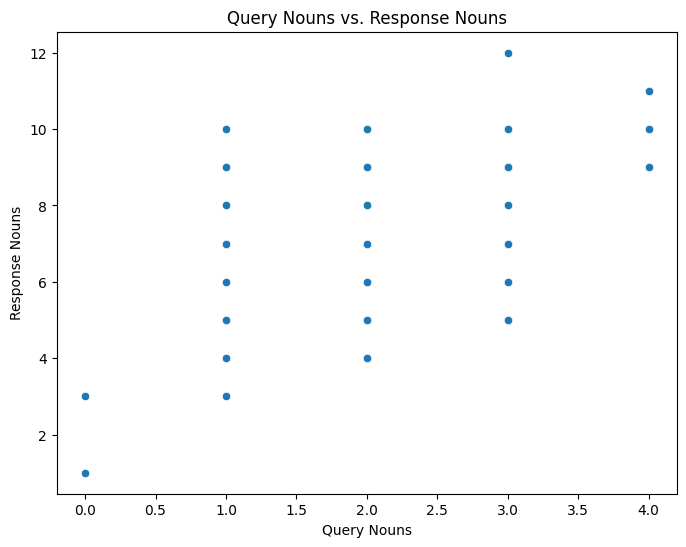

In [49]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to count nouns in text
def count_nouns(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.pos_ == "NOUN")

# Calculate number of nouns in queries and responses
df["query_nouns"] = df["Query"].apply(count_nouns)
df["response_nouns"] = df["Response"].apply(count_nouns)

# Calculate correlation
correlation = df["query_nouns"].corr(df["response_nouns"])
print(f"Correlation between query nouns and response nouns: {correlation:.2f}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x="query_nouns", y="response_nouns", data=df)
plt.title("Query Nouns vs. Response Nouns")
plt.xlabel("Query Nouns")
plt.ylabel("Response Nouns")
plt.show()

In [50]:
# Load spaCy model for part-of-speech tagging
nlp = spacy.load("en_core_web_sm")

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Function to count nouns in text
def count_nouns(text):
    doc = nlp(text)
    return sum(1 for token in doc if token.pos_ == "NOUN")

# Calculate numeric features
df["query_length"] = df["Query"].apply(lambda x: len(x.split()))  # Length of query
df["response_length"] = df["Response"].apply(lambda x: len(x.split()))  # Length of response
df["query_sentiment"] = df["Query"].apply(get_sentiment)  # Sentiment of query
df["response_sentiment"] = df["Response"].apply(get_sentiment)  # Sentiment of response
df["query_nouns"] = df["Query"].apply(count_nouns)  # Number of nouns in query
df["response_nouns"] = df["Response"].apply(count_nouns)  # Number of nouns in response

# Display the first few rows with numeric features
print(df.head())

                                               Query  \
0                 How can I open a new bank account?   
1  What do I need to provide to open a bank account?   
2                How can I check my account balance?   
3          How do I transfer money between accounts?   
4       Can I set up direct deposit for my paycheck?   

                                            Response  query_length  \
0  To open a new bank account, visit our website ...             8   
1  You will need to provide a valid ID, proof of ...            11   
2  You can check your account balance by logging ...             7   
3  Log into your online banking account or mobile...             7   
4  Yes, you can set up direct deposit by providin...             9   

   response_length  query_sentiment  response_sentiment  query_nouns  \
0               24         0.068182            0.045455            2   
1               20         0.000000            0.033333            2   
2               25        

In [51]:
# Calculate the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Display the correlation matrix
print(correlation_matrix)

                    query_length  response_length  query_sentiment  \
query_length            1.000000         0.025036         0.104295   
response_length         0.025036         1.000000         0.067750   
query_sentiment         0.104295         0.067750         1.000000   
response_sentiment      0.006790        -0.037561         0.106600   
query_nouns             0.160212         0.028975        -0.089861   
response_nouns          0.011928         0.302085        -0.092838   

                    response_sentiment  query_nouns  response_nouns  
query_length                  0.006790     0.160212        0.011928  
response_length              -0.037561     0.028975        0.302085  
query_sentiment               0.106600    -0.089861       -0.092838  
response_sentiment            1.000000     0.293331        0.304440  
query_nouns                   0.293331     1.000000        0.530070  
response_nouns                0.304440     0.530070        1.000000  


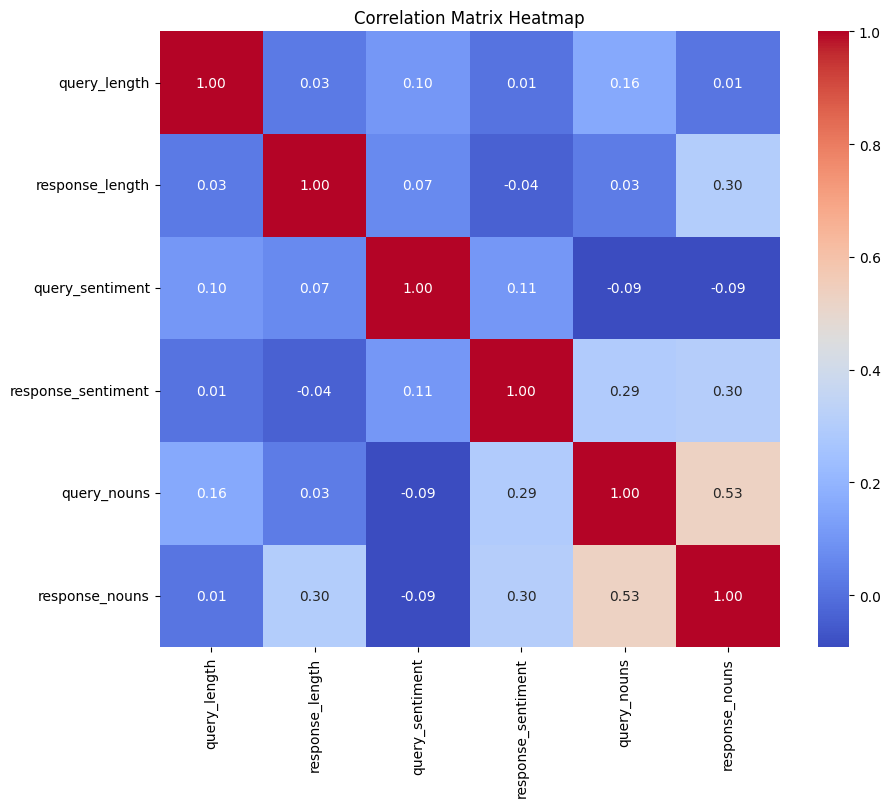

In [52]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")  # Added annot=True for better visualization
plt.title("Correlation Matrix Heatmap")
plt.show()

# Model implmentation

In [65]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the tokenizer and model
Model_name = 'gpt2-large'
tokenizer = GPT2Tokenizer.from_pretrained(Model_name)
model = GPT2LMHeadModel.from_pretrained(Model_name)

# Tokenizer padding adjustment for GPT2
tokenizer.pad_token = tokenizer.eos_token  # GPT-2 doesn't have a dedicated pad token

# Training and evaluation data
train_tokenized_dataset = train_tokenized_dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding="max_length", max_length=250), batched=True)
val_tokenized_dataset = val_tokenized_dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding="max_length", max_length=250), batched=True)

# Define a custom compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Flatten the predictions and labels
    predictions = predictions.flatten()
    labels = labels.flatten()

    # Calculate metrics
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted', zero_division=1)
    recall = recall_score(labels, predictions, average='weighted', zero_division=1)
    f1 = f1_score(labels, predictions, average='weighted', zero_division=1)

    return {
        'eval_accuracy': accuracy,
        'eval_precision': precision,
        'eval_recall': recall,
        'eval_f1': f1,
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,  # Add evaluation batch size
    gradient_accumulation_steps=4,
    evaluation_strategy="steps",  # Add evaluation strategy
    eval_steps=100,  # Evaluate every 100 steps
    learning_rate=0.001,
    save_steps=100,  # Save every 100 steps (must be a multiple of eval_steps)
    logging_dir='./logs',
    logging_steps=100,
    fp16=True,
    load_best_model_at_end=True,  # Load the best model at the end of training
    metric_for_best_model='eval_loss',  # Use eval_loss to determine the best model
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized_dataset,
    eval_dataset=val_tokenized_dataset,  # Use the full dataset for validation
    compute_metrics=compute_metrics,  # Add the custom compute_metrics function
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)

# Save the fine-tuned model and tokenizer
model.save_pretrained('fine-tuned-model1')
tokenizer.save_pretrained('fine-tuned-model1')

Map:   0%|          | 0/116 [00:00<?, ? examples/s]

Map:   0%|          | 0/145 [00:00<?, ? examples/s]

C:\Users\gnond\anaconda3\Lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss,Validation Loss


{'eval_accuracy': 0.8688275862068966, 'eval_precision': 0.9805205324988379, 'eval_recall': 0.8688275862068966, 'eval_f1': 0.8658867308128932, 'eval_loss': 0.6735915541648865, 'eval_runtime': 518.8099, 'eval_samples_per_second': 0.279, 'eval_steps_per_second': 0.141, 'epoch': 2.8275862068965516}


('fine-tuned-model1\\tokenizer_config.json',
 'fine-tuned-model1\\special_tokens_map.json',
 'fine-tuned-model1\\vocab.json',
 'fine-tuned-model1\\merges.txt',
 'fine-tuned-model1\\added_tokens.json')

In [73]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from datasets import Dataset

# Load the fine-tuned model and tokenizer
model = GPT2LMHeadModel.from_pretrained('fine-tuned-model1')
tokenizer = GPT2Tokenizer.from_pretrained('fine-tuned-model1')

# Ensure the model uses an EOS token for padding
tokenizer.pad_token = tokenizer.eos_token  

# Download necessary resources for BLEU scoring
nltk.download('punkt')

# Function to generate text from the model
def generate_response_from_prompt(prompt, max_length=100):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, 
                            pad_token_id=tokenizer.eos_token_id)

    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response

# Function to compute BLEU score
def compute_bleu_score(reference_texts, generated_texts):
    smooth = SmoothingFunction().method1
    bleu_scores = []

    for ref, gen in zip(reference_texts, generated_texts):
        reference_tokens = [nltk.word_tokenize(ref)]  # Tokenize reference
        generated_tokens = nltk.word_tokenize(gen)  # Tokenize generated text

        bleu = sentence_bleu(reference_tokens, generated_tokens, smoothing_function=smooth)
        bleu_scores.append(bleu)

    return sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0

# Extract the original query (input prompts) and reference responses
val_data['Query'] = val_data['text'].apply(lambda x: x.split(' ', 1)[0])  # Extract Query
val_data['Response'] = val_data['text'].apply(lambda x: x.split(' ', 1)[1])  # Extract Response

# Prepare reference texts and prompts
reference_texts = val_data['Response'].tolist()  # Ground truth responses
input_prompts = val_data['Query'].tolist()  # Input prompts

# Generate responses for validation dataset
generated_texts = [generate_response_from_prompt(prompt) for prompt in input_prompts]

# Compute BLEU score
bleu_score = compute_bleu_score(reference_texts, generated_texts)

# Print the BLEU score
print(f"Average BLEU Score on Validation Set: {bleu_score:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gnond\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\gnond/nltk_data'
    - 'C:\\Users\\gnond\\anaconda3\\nltk_data'
    - 'C:\\Users\\gnond\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\gnond\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\gnond\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
